In [1]:
import glob

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import weather


In [2]:
files = glob.glob("../../capstone/image/weather_results/*.csv")

In [3]:
files_092017 = [f for f in files if "-09-" in f]
dfs = [pd.read_csv(f, names=["dt", "mean"], header=None, skiprows=[0]) for f in files_092017]
dfs = [df for df in dfs if len(df) > 0]

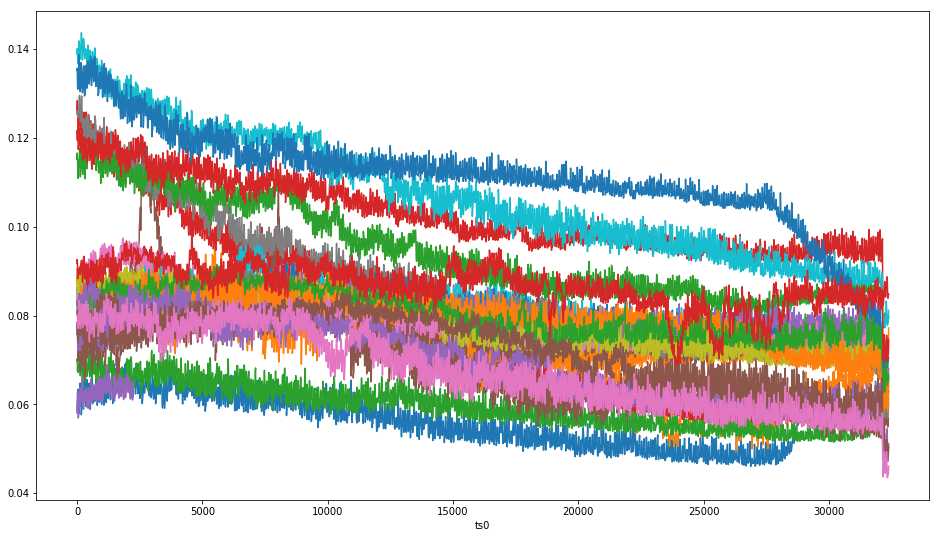

In [5]:
for df in dfs:
    df["dt"] = pd.to_datetime(df["dt"])
    df.sort_values("dt", inplace=True)
    df["ts0"] = (df["dt"] - df["dt"].iloc[0]).dt.total_seconds()
    df.set_index("ts0", inplace=True)
for df in dfs:
    ax = df["mean"].plot(figsize=(16, 9), label=df.iloc[0]["dt"].date())

In [38]:
!head -n 1 '../../capstone/image/weather_results/2017-09-01.csv'

,0
